# Linear Search part

n=1000, average lookup time=0.00002857 s
n=10000, average lookup time=0.00026902 s
n=100000, average lookup time=0.00271937 s
n=1000000, average lookup time=0.02849532 s
n=10000000, average lookup time=0.27586719 s


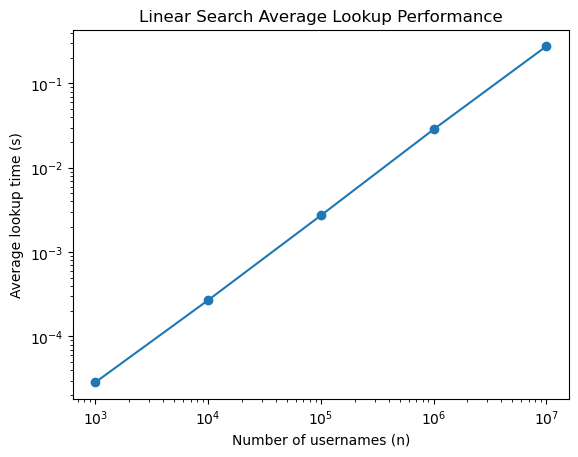

In [5]:
# Import necessary libraries
from random import choice, sample
from string import ascii_lowercase, digits
import matplotlib.pyplot as plt
import time

chars = ascii_lowercase + digits # random usernames
n_list_linear = [10**3, 10**4, 10**5, 10**6, 10**7]   # The list of n's (number of usernames) we will search through
times_linear = []

for n in n_list_linear:
    # generate random usernames
    usernames = [''.join(choice(chars) for _ in range(5)) + str(i) for i in range(n)]
    
    number = 1000 # Number of usernames you want to search
    lookups = min(number//2, len(usernames)) # number will either be half OR the total length of the usernames
    negative_samples = number - lookups # number of usernames to search NOT present (some usernames to search won't be present, and it doesn't matter, we just want to search)

    lookup_names = []
    lookup_names.extend(sample(usernames, lookups)) # the usernames to search
    lookup_names.extend([''.join(choice(chars) for _ in range(5)) for _ in range(negative_samples)]) # adding the names not present

    start_time = time.perf_counter_ns() # start recording time
    for name in lookup_names:
        for u in usernames:   # linear search through lookup_names
            if u == name:
                break # when found, break
    total_time = time.perf_counter_ns() - start_time # end time of search of total names

    avg_time_sec = (total_time / len(lookup_names)) / 1e9 # divide total time by no. of usernames to find the average lookup time in seconds
    times_linear.append(avg_time_sec) # append it to the list of times for each n

    print(f"n={n}, average lookup time={avg_time_sec:.8f} s")

# Plot the graph of n vs time
plt.plot(n_list_linear, times_linear, marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average lookup time (s)")
plt.title("Linear Search Average Lookup Performance")
plt.savefig("D:/HAMZA/1.UBC Ok/2-WT1 2025 (Sep-Dec 2025)/COSC 520 - Advanced Algorithms/Assignments/Ass.1 520/COSC-520-Assignment-1/Plots/Linear_search.png", dpi=300)
plt.show()

# Binary Search

n=1000, avg lookup time=0.000001369 s
n=10000, avg lookup time=0.000002291 s
n=100000, avg lookup time=0.000002320 s
n=1000000, avg lookup time=0.000004822 s
n=10000000, avg lookup time=0.000008601 s


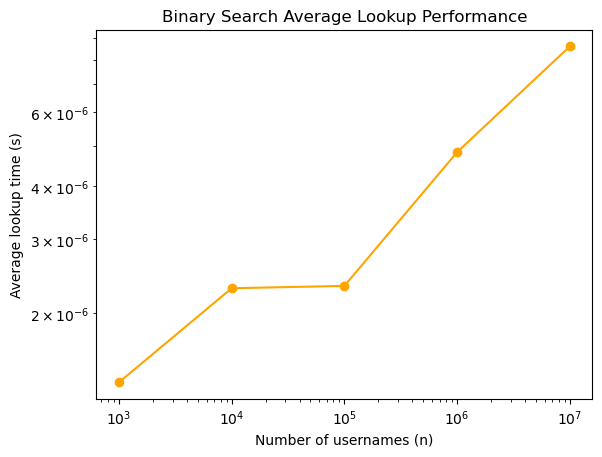

In [6]:
from random import choice, sample
from string import ascii_lowercase, digits
import matplotlib.pyplot as plt
import time

chars = ascii_lowercase + digits # random usernames
n_list_binary = [10**3, 10**4, 10**5, 10**6, 10**7]   # The list of n's (number of usernames) we will search through
times_binary = []

def binary_search(sorted_list, target):
    """
    Binary search function. Does the same as bisect.bisect_left.
    Goes to the middle of an array, sees if target is on the left or right (or middle), and bisects it continuously until the target is found
    """
    left, right = 0, len(sorted_list) - 1
    while left <= right:
        mid = (left + right) // 2
        if sorted_list[mid] == target:
            return True
        elif sorted_list[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return False

for n in n_list_binary:
    # Generate usernames
    usernames = [''.join(choice(chars) for _ in range(5)) + str(i) for i in range(n)]

    usernames.sort()  # sorting is required for binary search

    number = 1000 # Number of usernames you want to search
    lookups = min(number//2, len(usernames)) # number will either be half OR the total length of the usernames
    negative_samples = number - lookups # number of usernames to search NOT present (some usernames to search won't be present, and it doesn't matter, we just want to search)

    lookup_names = []
    lookup_names.extend(sample(usernames, lookups)) # the usernames to search
    lookup_names.extend([''.join(choice(chars) for _ in range(5)) for _ in range(negative_samples)]) # adding the names not present

    # Time multiple lookups
    start_time = time.perf_counter_ns()
    for name in lookup_names:
        binary_search(usernames, name)
    total_time = time.perf_counter_ns() - start_time

    avg_time_sec = (total_time / len(lookup_names)) / 1e9 # divide total time by no. of usernames to find the average lookup time in seconds
    times_binary.append(avg_time_sec)

    print(f"n={n}, avg lookup time={avg_time_sec:.9f} s")

# Plot the graph of n vs time
plt.plot(n_list_binary, times_binary, marker='o', color='orange')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average lookup time (s)")
plt.title("Binary Search Average Lookup Performance")
plt.savefig("D:/HAMZA/1.UBC Ok/2-WT1 2025 (Sep-Dec 2025)/COSC 520 - Advanced Algorithms/Assignments/Ass.1 520/COSC-520-Assignment-1/Plots/Binary_search.png", dpi=300)
plt.show()


# Hashing (MurmurHash)

n=1000, avg lookup time=0.000000347 s
n=10000, avg lookup time=0.000000378 s
n=100000, avg lookup time=0.000000452 s
n=1000000, avg lookup time=0.000000692 s
n=10000000, avg lookup time=0.000000872 s


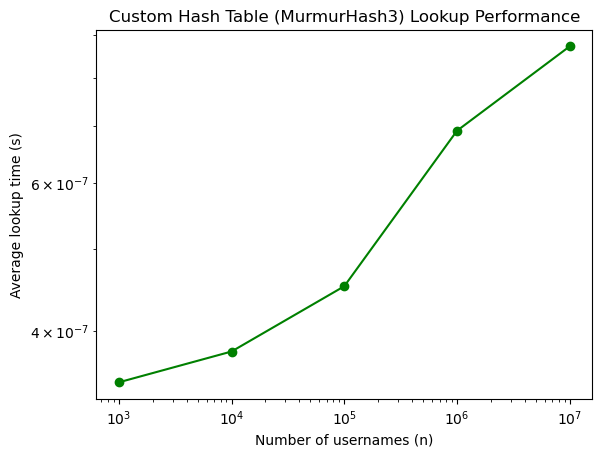

In [7]:
import mmh3
from random import choice, sample
from string import ascii_lowercase, digits
import matplotlib.pyplot as plt
import time

# Simple hash table using MurmurHash3 + chaining
# Using MurmurHash3 for hashing. It is non-cryptographic so it's faster and security is not needed for this assignment's purpose.
# Tried SHA-256 but it was taking too long
class HashTable:
    def __init__(self, size=10**6):
        # Initialize table with empty lists for chaining
        self.size = size
        self.table = [[] for _ in range(size)]

    def _hash(self, key):
        # Compute hash index using MurmurHash3
        return mmh3.hash(key) % self.size

    def insert(self, key):
        # Insert key if not already present in the chain
        idx = self._hash(key)
        if key not in self.table[idx]:
            self.table[idx].append(key)

    def contains(self, key):
        # Check if key exists in the hash table
        idx = self._hash(key)
        return key in self.table[idx]

# Parameters
chars = ascii_lowercase + digits
n_list_hash = [10**3, 10**4, 10**5, 10**6, 10**7] # test sizes
times_hash = []

for n in n_list_hash:
    # Generate usernames (5 random characters + unique number)
    usernames = [''.join(choice(chars) for _ in range(5)) + str(i) for i in range(n)]

    # Build hash table of size ~2n to reduce collisions
    ht = HashTable(size=2 * n)
    for name in usernames:
        ht.insert(name)

    # Decide how many lookups to perform (based on smallest n)
    number = 1000 
    lookups = min(number//2, len(usernames))
    negative_samples = number - lookups

    # Build lookup set: mix of existing and non-existing usernames
    lookup_names = []
    lookup_names.extend(sample(usernames, lookups))
    lookup_names.extend([''.join(choice(chars) for _ in range(5)) for _ in range(negative_samples)])

    # Time multiple lookups
    start_time = time.perf_counter_ns()
    for name in lookup_names:
        ht.contains(name)
    total_time = time.perf_counter_ns() - start_time

    # Compute average lookup time (convert from ns to seconds)
    avg_time_sec = (total_time / len(lookup_names)) / 1e9
    times_hash.append(avg_time_sec)

    print(f"n={n}, avg lookup time={avg_time_sec:.9f} s")

# Plot results n vs. time
plt.plot(n_list_hash, times_hash, marker='o', color='green')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average lookup time (s)")
plt.title("Custom Hash Table (MurmurHash3) Lookup Performance")
plt.savefig("D:/HAMZA/1.UBC Ok/2-WT1 2025 (Sep-Dec 2025)/COSC 520 - Advanced Algorithms/Assignments/Ass.1 520/COSC-520-Assignment-1/Plots/Hash_Table.png", dpi=300)
plt.show()


# Bloom Filter (MurmurHash)

n=1000, avg lookup time=0.000003642 s (sampled 1000 usernames)
n=10000, avg lookup time=0.000002326 s (sampled 1000 usernames)
n=100000, avg lookup time=0.000002714 s (sampled 1000 usernames)
n=1000000, avg lookup time=0.000002757 s (sampled 1000 usernames)
n=10000000, avg lookup time=0.000005172 s (sampled 1000 usernames)


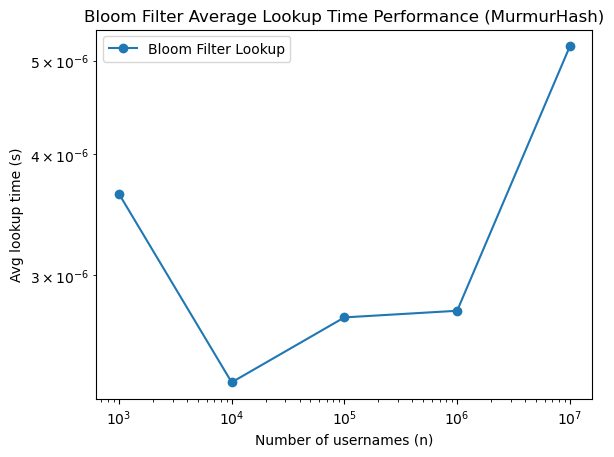

In [11]:
import mmh3, time, random
from string import ascii_lowercase, digits
from bitarray import bitarray
import matplotlib.pyplot as plt
import numpy as np

# Using MurmurHash3 for both hashing functions
class BloomFilter:
    def __init__(self, size=1000000, hash_count=5):
        self.size = size
        self.hash_count = hash_count
        self.bit_array = bitarray(size)
        self.bit_array.setall(0)

    def _hashes(self, item):
        # mmh3 returns 32-bit signed int, take abs to avoid negatives
        return [(abs(mmh3.hash(item, i)) % self.size) for i in range(self.hash_count)]

    # inserting a username
    def add(self, item):
        for index in self._hashes(item):
            self.bit_array[index] = 1

    # checking if a username exists
    def check(self, item):
        return all(self.bit_array[index] for index in self._hashes(item))


chars = ascii_lowercase + digits
n_list_bloom = [10**3, 10**4, 10**5, 10**6, 10**7]  # list of username numbers to add 
times_bloom = []

for n in n_list_bloom:
    # Generate usernames
    usernames = [''.join(random.choice(chars) for _ in range(5)) + str(i) for i in range(n)]

    # Create Bloom filter
    bf = BloomFilter(size=n*10, hash_count=5)

    # Add all usernames
    for name in usernames:
        bf.add(name)

    number = 1000 # Number of usernames you want to search
    lookups = min(number//2, len(usernames)) # number will either be half OR the total length of the usernames
    negative_samples = number - lookups # number of usernames to search NOT present (some usernames to search won't be present, and it doesn't matter, we just want to search)

    lookup_names = []
    lookup_names.extend(sample(usernames, lookups)) # the usernames to search
    lookup_names.extend([''.join(choice(chars) for _ in range(5)) for _ in range(negative_samples)]) # adding the names not present

    # Time lookups
    start = time.perf_counter_ns()
    for u in lookup_names:
        _ = bf.check(u)
    end = time.perf_counter_ns()

    avg_time = ((end - start) / number) / 1e9 # Find average time of a lookup
    times_bloom.append(avg_time)

    print(f"n={n}, avg lookup time={avg_time:.9f} s (sampled {number} usernames)")

# Plot Results of times taken to search an entry using a Bloom Filter
plt.plot(n_list_bloom, times_bloom, marker="o", label="Bloom Filter Lookup")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of usernames (n)")
plt.ylabel("Avg lookup time (s)")
plt.title("Bloom Filter Average Lookup Time Performance (MurmurHash)")
plt.legend()
plt.savefig("D:/HAMZA/1.UBC Ok/2-WT1 2025 (Sep-Dec 2025)/COSC 520 - Advanced Algorithms/Assignments/Ass.1 520/COSC-520-Assignment-1/Plots/Bloom_Filter.png", dpi=300)
plt.show()

# Cuckoo Filter

n=1000, avg lookup time=0.000002958 s
n=10000, avg lookup time=0.000003165 s
n=100000, avg lookup time=0.000003096 s
n=1000000, avg lookup time=0.000003496 s
n=10000000, avg lookup time=0.000003743 s


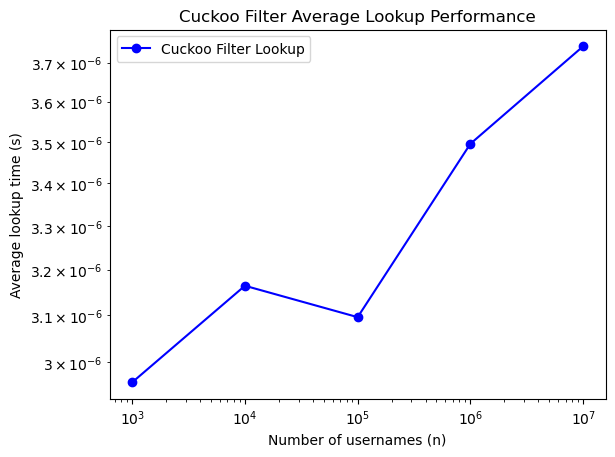

In [9]:
# import necessary libraries
import hashlib, random, time
from string import ascii_lowercase, digits
import matplotlib.pyplot as plt
from random import sample

# Cuckoo Filter 
class CuckooFilter:
    def __init__(self, bucket_count=10000, bucket_size=2, max_kicks=500):
        # Number of buckets in the filter
        self.bucket_count = bucket_count
        # Number of fingerprint slots per bucket
        self.bucket_size = bucket_size
        # Max number of evictions allowed when inserting
        self.max_kicks = max_kicks
        # Initialize buckets as empty lists
        self.buckets = [[] for _ in range(bucket_count)]

    def _fingerprint(self, item):
        # Create a short fingerprint of the item (fixed-size string)
        # Using SHA-256 then truncating to 32 hex chars
        # (Not secure, but fine for demonstration)
        h = hashlib.sha256(item.encode()).hexdigest()
        return h[:32]

    def _hashes(self, fp):
        # Compute two candidate bucket indices for a fingerprint
        h1 = int(hashlib.sha256(fp.encode()).hexdigest(), 16) % self.bucket_count
        h2 = (h1 ^ int(hashlib.sha256(fp.encode()).hexdigest(), 16)) % self.bucket_count
        return h1, h2

    def insert(self, item):
        # Insert an item by placing its fingerprint into one of two buckets
        fp = self._fingerprint(item)
        i1, i2 = self._hashes(fp)

        # Try direct insert in either candidate bucket
        for i in [i1, i2]:
            if len(self.buckets[i]) < self.bucket_size:
                self.buckets[i].append(fp)
                return True

        # If both are full, perform "kicks" (evictions)
        i = random.choice([i1, i2])
        for _ in range(self.max_kicks):
            # Evict a random fingerprint from bucket i
            j = random.randint(0, self.bucket_size - 1)
            fp, self.buckets[i][j] = self.buckets[i][j], fp  # swap the content of the two buckets

            # Compute alternate index for evicted fingerprint
            i1, i2 = self._hashes(fp)
            i = i2 if i == i1 else i1

            # Try to place evicted fingerprint in alternate bucket
            if len(self.buckets[i]) < self.bucket_size:
                self.buckets[i].append(fp)
                return True

        # If insertion fails after max_kicks, filter is full
        return False

    def lookup(self, item):
        # Lookup checks if fingerprint exists in either candidate bucket
        fp = self._fingerprint(item)
        i1, i2 = self._hashes(fp)
        return fp in self.buckets[i1] or fp in self.buckets[i2]

chars = ascii_lowercase + digits
n_list_cuckoo = [10**3, 10**4, 10**5, 10**6, 10**7]   # test different sizes of n (number of usernames)
times_cuckoo = []  # store average lookup times

for n in n_list_cuckoo:
    # Generate n usernames (random 5 chars + unique index)
    usernames = [''.join(random.choice(chars) for _ in range(5)) + str(i) for i in range(n)]

    # Initialize Cuckoo Filter with 2n buckets and 4 slots each
    cf = CuckooFilter(bucket_count=n*2, bucket_size=4)

    # Insert usernames into the filter
    for name in usernames:
        cf.insert(name)

    # Build lookup test set (half positive, half negative)
    number = 1000  # fixed lookup count
    lookups = min(number//2, len(usernames))       # positive (present) lookups
    negative_samples = number - lookups            # negative (not present) lookups

    lookup_names = []
    lookup_names.extend(sample(usernames, lookups))  # sample existing usernames
    lookup_names.extend([''.join(random.choice(chars) for _ in range(5)) for _ in range(negative_samples)])  # random new

    # Time the lookups
    start = time.perf_counter_ns()
    for name in lookup_names:
        cf.lookup(name)
    total_time = time.perf_counter_ns() - start

    # Compute average lookup time in seconds for one search
    avg_time_sec = (total_time / len(lookup_names)) / 1e9
    times_cuckoo.append(avg_time_sec)

    print(f"n={n}, avg lookup time={avg_time_sec:.9f} s")

# Plot Results of n vs. time
plt.plot(n_list_cuckoo, times_cuckoo, marker="o", color="blue", label="Cuckoo Filter Lookup")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average lookup time (s)")
plt.title("Cuckoo Filter Average Lookup Performance")
plt.legend()
plt.savefig("D:/HAMZA/1.UBC Ok/2-WT1 2025 (Sep-Dec 2025)/COSC 520 - Advanced Algorithms/Assignments/Ass.1 520/COSC-520-Assignment-1/Plots/Cuckoo_Filter.png", dpi=300)
plt.show()

# All Data structures together

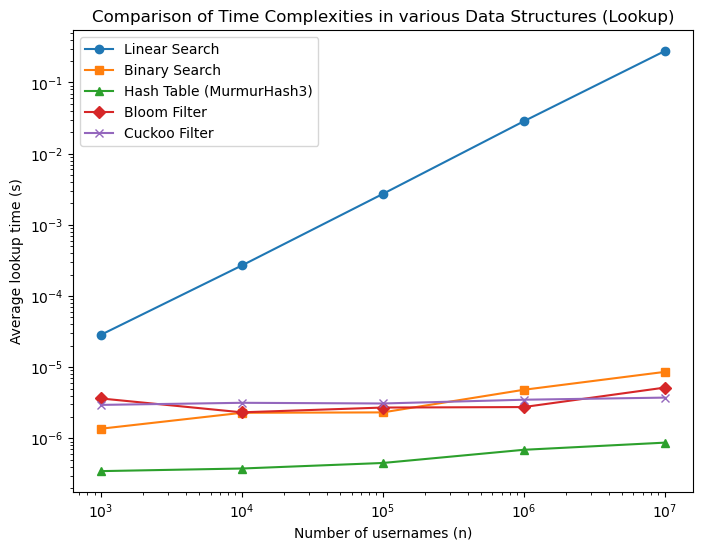

In [21]:
import matplotlib.pyplot as plt

# Combined comparison plot
plt.figure(figsize=(8,6))

plt.plot(n_list_linear, times_linear, marker="o", label="Linear Search")
plt.plot(n_list_binary, times_binary, marker="s", label="Binary Search")
plt.plot(n_list_hash, times_hash, marker="^", label="Hash Table (MurmurHash3)")
plt.plot(n_list_bloom, times_bloom, marker="D", label="Bloom Filter")
plt.plot(n_list_cuckoo, times_cuckoo, marker="x", label="Cuckoo Filter")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Number of usernames (n)")
plt.ylabel("Average lookup time (s)")
plt.title("Comparison of Time Complexities in various Data Structures (Lookup)")
plt.legend()
plt.savefig("Plots/Comparison of Lookup Time Complexities.png", dpi=300)
plt.show()

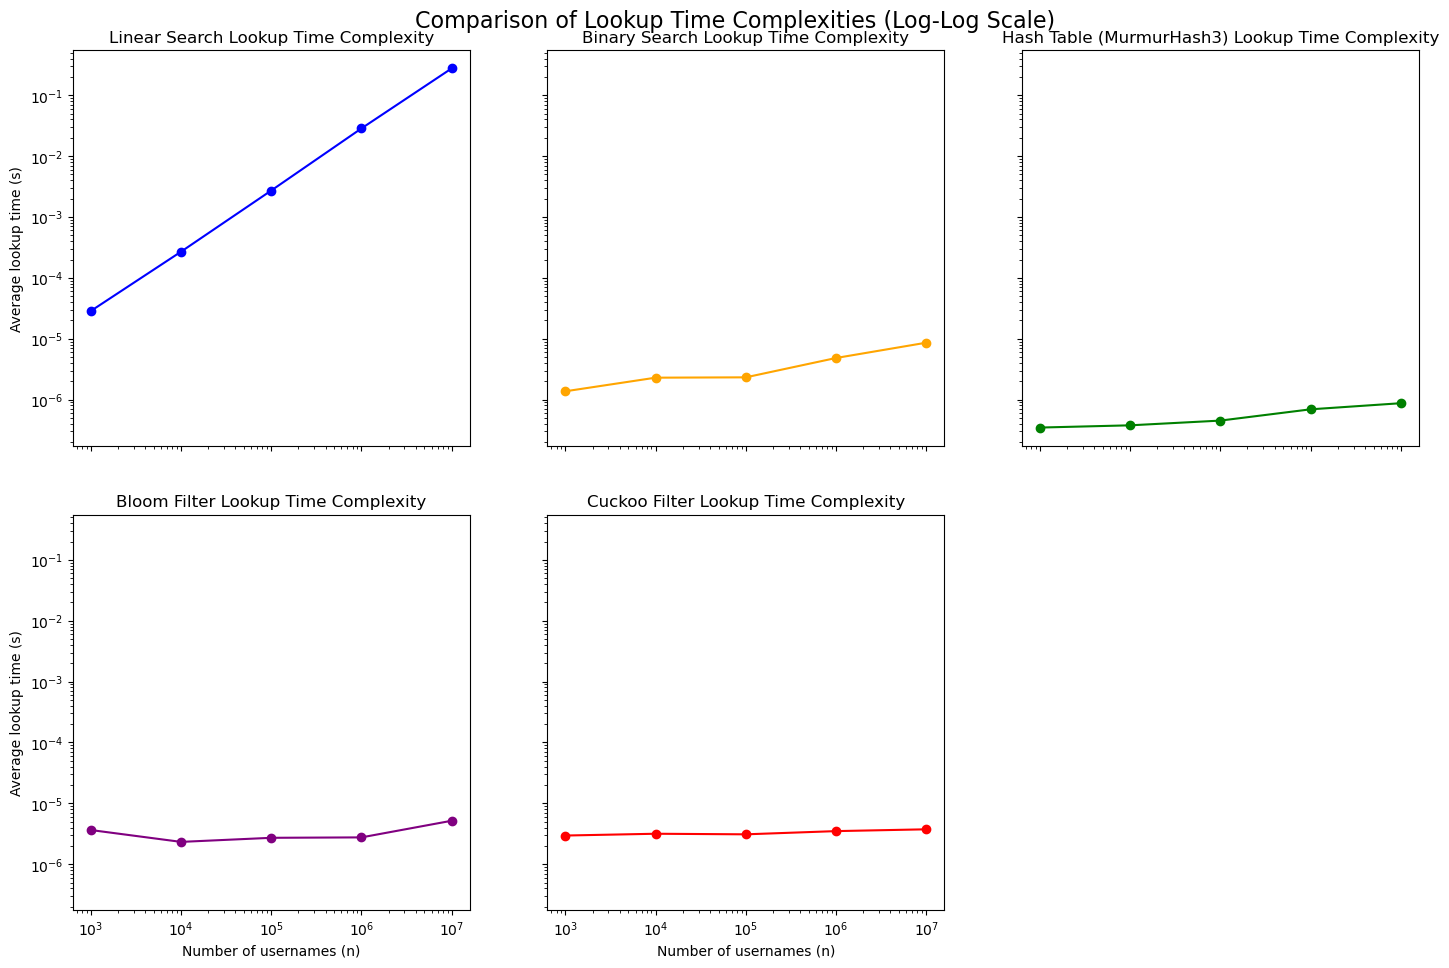

In [19]:
import matplotlib.pyplot as plt

# Create 2x3 grid, share x and y axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)
fig.tight_layout(pad=4)

# Data and labels for each subplot
plots = [
    (n_list_linear, times_linear, "Linear Search Lookup Time Complexity", "blue"),
    (n_list_binary, times_binary, "Binary Search Lookup Time Complexity", "orange"),
    (n_list_hash, times_hash, "Hash Table (MurmurHash3) Lookup Time Complexity", "green"),
    (n_list_bloom, times_bloom, "Bloom Filter Lookup Time Complexity", "purple"),
    (n_list_cuckoo, times_cuckoo, "Cuckoo Filter Lookup Time Complexity", "red"),
]

# Plot top row: 3 plots
for i in range(3):
    axes[0, i].plot(plots[i][0], plots[i][1], marker="o", color=plots[i][3])
    axes[0, i].set_title(plots[i][2])
    axes[0, i].set_xscale("log")
    axes[0, i].set_yscale("log")

# Plot bottom row: 2 plots
for i in range(2):
    axes[1, i].plot(plots[i+3][0], plots[i+3][1], marker="o", color=plots[i+3][3])
    axes[1, i].set_title(plots[i+3][2])
    axes[1, i].set_xscale("log")
    axes[1, i].set_yscale("log")

# Remove the empty subplot (last in bottom row)
fig.delaxes(axes[1, 2])

# Labels
for ax in axes[1, :2]:
    ax.set_xlabel("Number of usernames (n)")
for ax in axes[:, 0]:
    ax.set_ylabel("Average lookup time (s)")

plt.suptitle("Comparison of Lookup Time Complexities (Log-Log Scale)", fontsize=16)
plt.savefig("Plots/Comparison_Lookup_Subplots_SharedAxes.png", dpi=300)
plt.show()

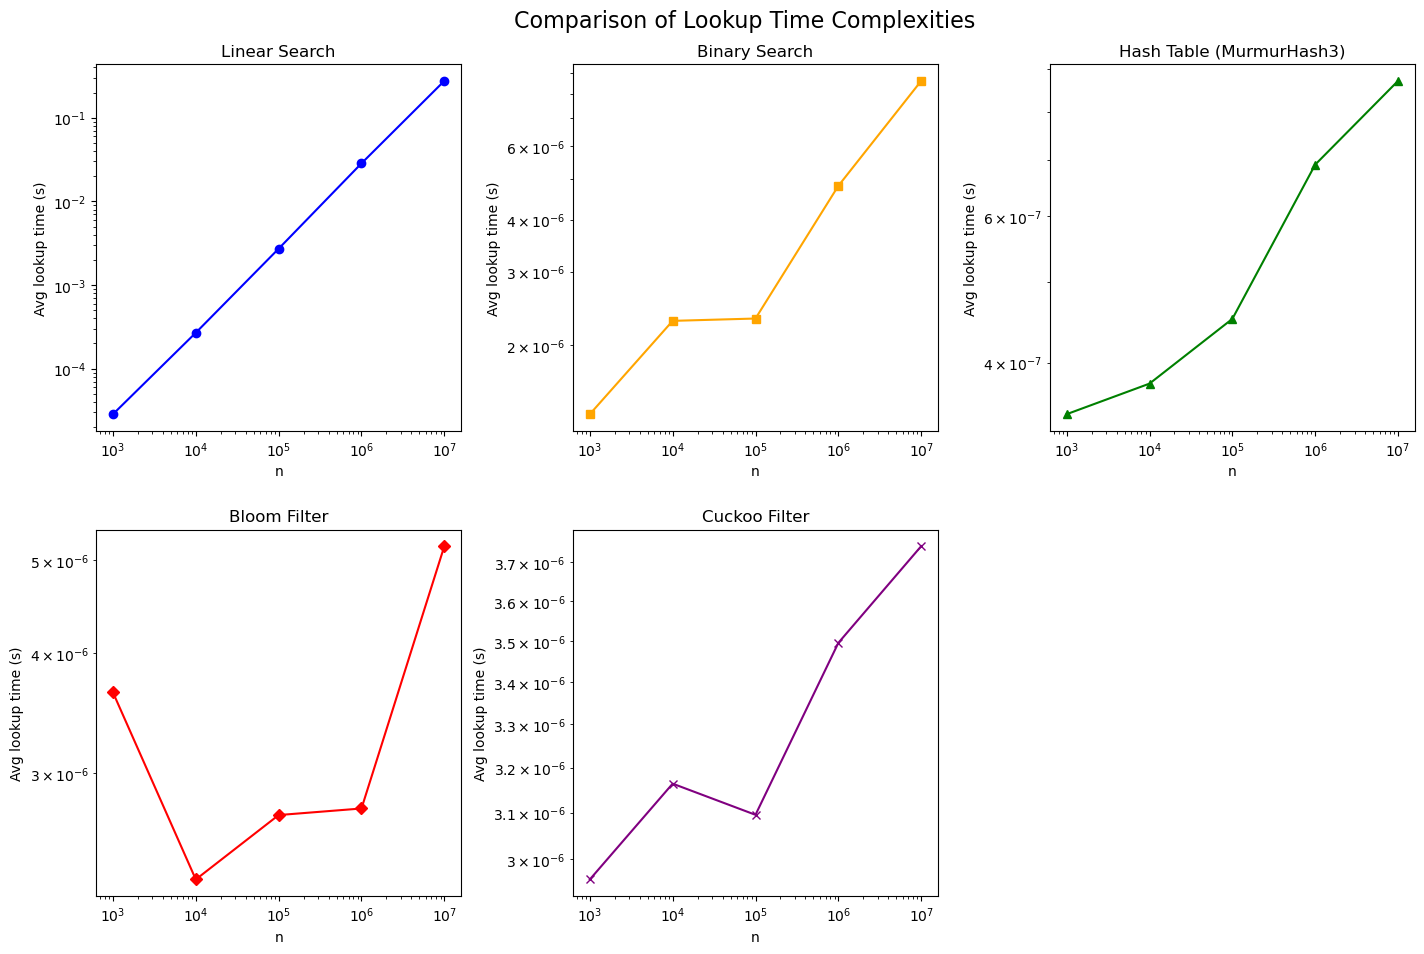

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
fig.tight_layout(pad=5)  # spacing between subplots

# Top row: 3 plots
axes[0, 0].plot(n_list_linear, times_linear, marker="o", color="blue")
axes[0, 0].set_xscale("log")
axes[0, 0].set_yscale("log")
axes[0, 0].set_title("Linear Search")
axes[0, 0].set_xlabel("n")
axes[0, 0].set_ylabel("Avg lookup time (s)")

axes[0, 1].plot(n_list_binary, times_binary, marker="s", color="orange")
axes[0, 1].set_xscale("log")
axes[0, 1].set_yscale("log")
axes[0, 1].set_title("Binary Search")
axes[0, 1].set_xlabel("n")
axes[0, 1].set_ylabel("Avg lookup time (s)")

axes[0, 2].plot(n_list_hash, times_hash, marker="^", color="green")
axes[0, 2].set_xscale("log")
axes[0, 2].set_yscale("log")
axes[0, 2].set_title("Hash Table (MurmurHash3)")
axes[0, 2].set_xlabel("n")
axes[0, 2].set_ylabel("Avg lookup time (s)")

# Bottom row: 2 plots (leave last subplot empty)
axes[1, 0].plot(n_list_bloom, times_bloom, marker="D", color="red")
axes[1, 0].set_xscale("log")
axes[1, 0].set_yscale("log")
axes[1, 0].set_title("Bloom Filter")
axes[1, 0].set_xlabel("n")
axes[1, 0].set_ylabel("Avg lookup time (s)")

axes[1, 1].plot(n_list_cuckoo, times_cuckoo, marker="x", color="purple")
axes[1, 1].set_xscale("log")
axes[1, 1].set_yscale("log")
axes[1, 1].set_title("Cuckoo Filter")
axes[1, 1].set_xlabel("n")
axes[1, 1].set_ylabel("Avg lookup time (s)")

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.suptitle("Comparison of Lookup Time Complexities", fontsize=16)
plt.savefig("Plots/Comparison_Lookup_Subplots.png", dpi=300)
plt.show()
